## ***Imports***

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go

# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

#sns.set_style('white')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format
# sutunun genisligi
pd.options.display.max_colwidth = 100

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'black', 
              'weight': 'normal', 'size': 16}
axis_font  = {'family': 'times new roman', 'color': 'black', 
              'weight': 'normal', 'size': 16}
#custom color codes
mycolors = ['#CB4335','#3498DB', '#138D75', 
            '#E74C3C', '#5499C7', '#73C6B6', 
            '#C39BD3', '#E59866', '#16A085']
#my_palette = sns.color_palette(mycolors)

plt.rcParams["font.family"] = "times new roman"
plt.rcParams["font.size"] = "14"
plt.rcParams["axes.labelweight"] = "normal"

---
### ***Analysis for different payload size***

#### ***Data Preprocessing***

In [57]:
# veri setini dataframe icerisine yukle
hlf = pd.DataFrame([])
directory = 'create'
test_type = 'channel_population'
payload_size = '1 KB'
#conf_modes = ['2_orgs']
conf_modes = ['queryFabcar','query','create','supply']
test_duration = 120
for conf in conf_modes:    
     for send_rate in [1,2,5,10,20, 50, 100, 200, 500, 1000]:
        df = pd.read_csv(directory+'/'+test_type+'/'+conf+'/'+str(send_rate)+'_users_'+directory+'_stats.csv')
        df['send_rate'] = send_rate
        df[test_type] = conf
        df['payload_size'] = conf
        df['duration'] = test_duration
        #df.drop(index=1, inplace=True)
        hlf = pd.concat([hlf, df], ignore_index=True)

In [58]:
hlf

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%,send_rate,channel_population,payload_size,duration
0,GET,/supply/supplylist,299,0,190.000,198.067,141.466,488.118,15.000,1.002,0.000,190,200,210,220,230,250,290,330,490,490,490,1,queryFabcar,queryFabcar,120
1,NaN,Aggregated,299,0,190.000,198.067,141.466,488.118,15.000,1.002,0.000,190,200,210,220,230,250,290,330,490,490,490,1,queryFabcar,queryFabcar,120
2,GET,/supply/supplylist,597,0,340.000,339.279,183.051,536.286,15.000,1.998,0.000,340,360,380,390,410,420,460,480,540,540,540,2,queryFabcar,queryFabcar,120
3,NaN,Aggregated,597,0,340.000,339.279,183.051,536.286,15.000,1.998,0.000,340,360,380,390,410,420,460,480,540,540,540,2,queryFabcar,queryFabcar,120
4,GET,/supply/supplylist,1478,0,560.000,564.510,222.252,"1,352.592",15.000,4.943,0.000,560,620,670,700,830,930,1000,1100,1300,1400,1400,5,queryFabcar,queryFabcar,120
5,NaN,Aggregated,1478,0,560.000,564.510,222.252,"1,352.592",15.000,4.943,0.000,560,620,670,700,830,930,1000,1100,1300,1400,1400,5,queryFabcar,queryFabcar,120
6,GET,/supply/supplylist,1623,0,"1,800.000","1,819.488",475.086,"3,091.605",15.000,5.430,0.000,1800,2000,2000,2100,2300,2400,2500,2700,2900,3100,3100,10,queryFabcar,queryFabcar,120
7,NaN,Aggregated,1623,0,"1,800.000","1,819.488",475.086,"3,091.605",15.000,5.430,0.000,1800,2000,2000,2100,2300,2400,2500,2700,2900,3100,3100,10,queryFabcar,queryFabcar,120
8,GET,/supply/supplylist,1798,0,"3,300.000","3,278.237",552.837,"5,403.129",15.000,6.015,0.000,3300,3500,3600,3700,3900,4300,4600,4800,5400,5400,5400,20,queryFabcar,queryFabcar,120
9,NaN,Aggregated,1798,0,"3,300.000","3,278.237",552.837,"5,403.129",15.000,6.015,0.000,3300,3500,3600,3700,3900,4300,4600,4800,5400,5400,5400,20,queryFabcar,queryFabcar,120


In [59]:
#hlf.drop(hlf.columns[range(11,23)], axis=1, inplace=True)
hlf.drop(columns=['Type','Average Content Size'], inplace=True)
hlf = hlf.rename(columns={'Average Response Time': 'average_latency', 
                        'Median Response Time': 'median_latency', 
                        'Min Response Time': 'min_latency', 'Max Response Time': 'max_latency',
                        'Request Count': 'request_count', 'Failure Count': 'failure_count'})

In [60]:
# transaction throughput = total committed transactions / total time in secs
hlf['throughput'] = (hlf['request_count']-hlf['failure_count']) / hlf['duration'] 
hlf['failure_ratio'] = hlf['failure_count'] / hlf['request_count'] * 100
hlf['success_count'] = hlf['request_count'] - hlf['failure_count']
hlf['success_ratio'] = hlf['success_count'] / hlf['request_count'] * 100

#### ***Plot Throughput***

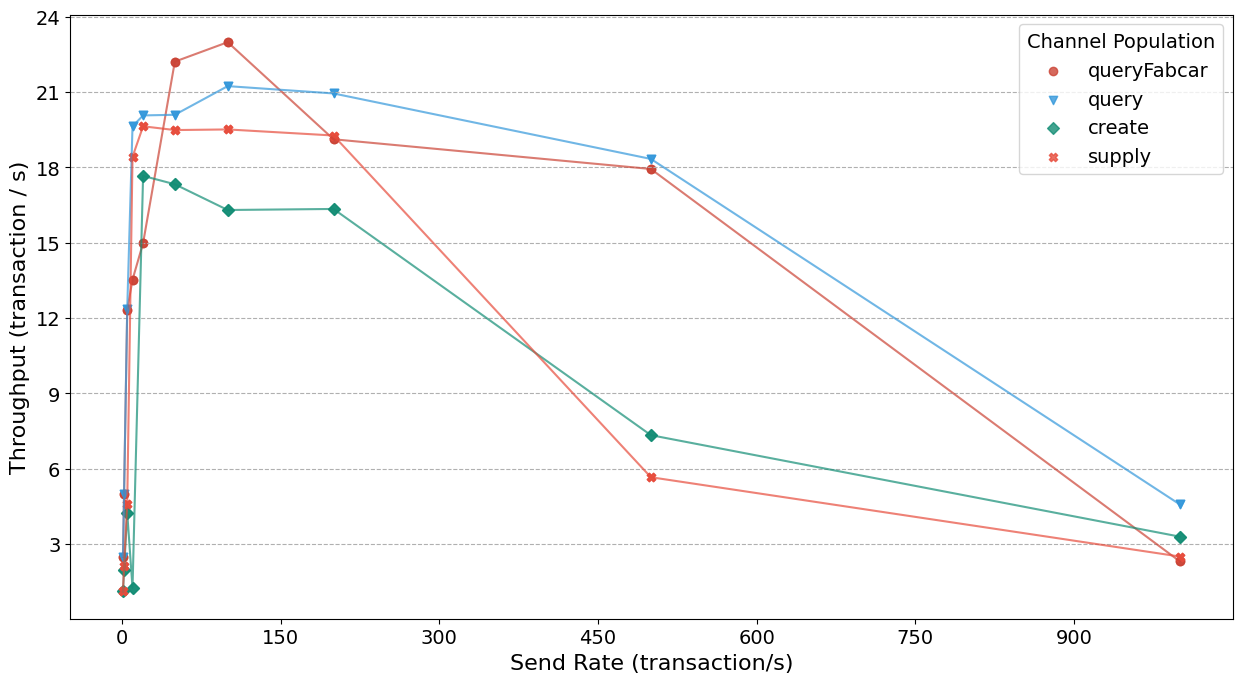

In [61]:
from matplotlib.ticker import MaxNLocator
fig, ax0 = plt.subplots(1, 1, figsize=(15, 8),dpi=100)
markers = ['o','v','D', 'X', 'p']
target_var = 'throughput'
unit = ' (transaction / s)'
#fig, ax = plt.subplots()
for i, conf in enumerate(conf_modes):
    ax0.scatter(hlf[hlf[test_type]==conf]['send_rate'],
                hlf[hlf[test_type]==conf][target_var], 
                marker=markers[i],
                color=mycolors[i], 
                alpha=0.8,
                label=conf.replace('_',' '))
    ax0.plot(hlf[hlf[test_type]==conf]['send_rate'],
             hlf[hlf[test_type]==conf][target_var], 
             color=mycolors[i], 
             alpha=0.7)
    ax0.set_ylabel(target_var.replace('_', ' ').title()+unit, fontdict=axis_font)
    ax0.set_xlabel('Send Rate (transaction/s)', fontdict=axis_font)
    ax0.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax0.xaxis.set_major_locator(MaxNLocator(integer=True))
    #ax0.set_xscale('log')
    ax0.legend(title=test_type.replace('_', ' ').title(),loc=1)
    plt.gca().yaxis.grid(True, linestyle='--')

plt.savefig('./images/'+directory+'_'+test_type+'_'+target_var+'.png', bbox_inches='tight')
plt.show()

#### ***Plot Latency***

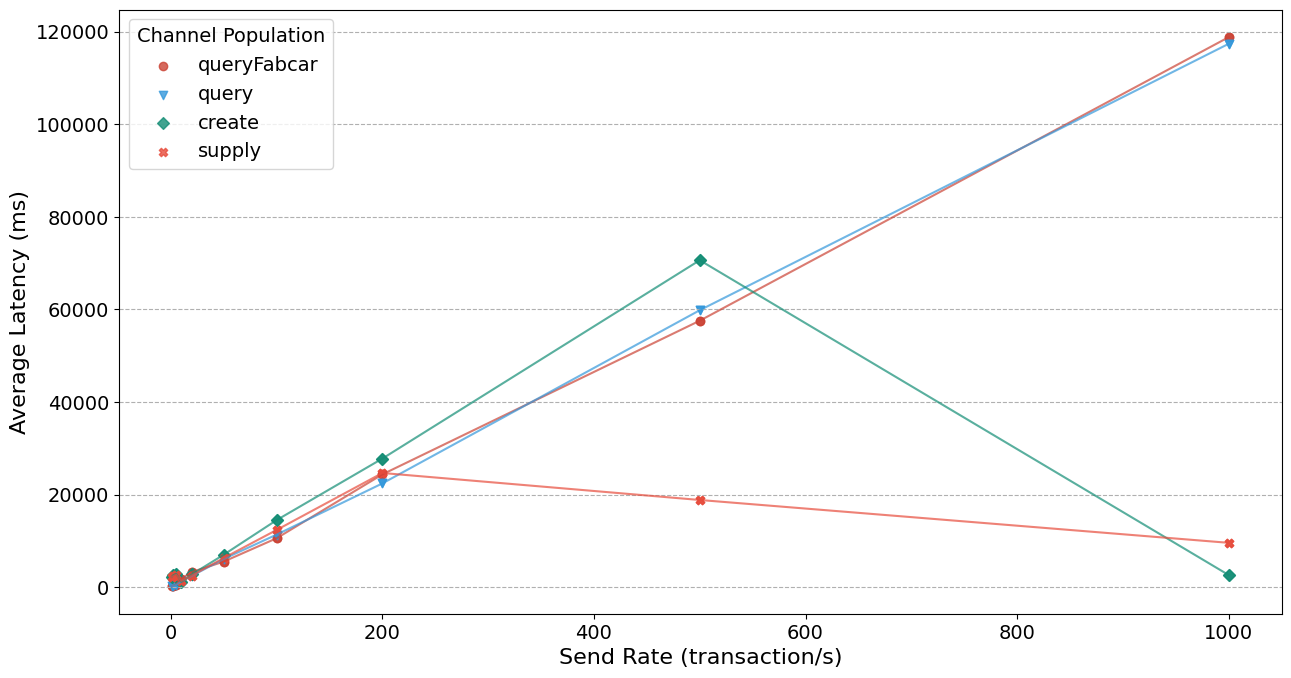

In [63]:
fig, ax0 = plt.subplots(1, 1, figsize=(15, 8),dpi=100)
markers = ['o','v','D', 'X', 'p']
target_var = 'average_latency'
unit = ' (ms)'
#fig, ax = plt.subplots()
for i, conf in enumerate(conf_modes):
    ax0.scatter(hlf[hlf[test_type]==conf]['send_rate'],
                hlf[hlf[test_type]==conf][target_var], 
                marker=markers[i],
                color=mycolors[i], 
                alpha=0.8,
                label=conf.replace('_',' '))
    ax0.plot(hlf[hlf[test_type]==conf]['send_rate'],
             hlf[hlf[test_type]==conf][target_var], 
             color=mycolors[i], 
             alpha=0.7)
    ax0.set_ylabel(target_var.replace('_', ' ').title()+unit, fontdict=axis_font)
    ax0.set_xlabel('Send Rate (transaction/s)', fontdict=axis_font)
    #ax0.set_xscale('log')
    ax0.legend(title=test_type.replace('_', ' ').title(),loc=2)
    plt.gca().yaxis.grid(True, linestyle='--')

plt.savefig('./images/'+directory+'_'+test_type+'_'+target_var+'.png', bbox_inches='tight')
    
plt.show()

### ***Test results table***

In [11]:
test = 'Create'
metrics = ['throughput', 'average_latency']
names = ['Throughput (tps)', 'Average Latency (ms)']
unit_conf = ''
test_name = test_type.replace('_',' ').title() + unit_conf


print('\multirow{2}{*}{Transaction Type} & \multicolumn{2}{l}{\multirow{2}{*}{Metric}} ', end='')
print('&  \multicolumn{'+str(len(conf_modes))+'}{c}{'+test_name+'} \\\\')

cline_start=4
cline_end= cline_start+ len(conf_modes)-1
print('\cline{'+str(cline_start)+'-'+str(cline_end)+'}')

print('& &', end='')
for conf in conf_modes:
    print(' & '+ conf.replace('_',' ').title() ,end='' )
print(' \\\\')

cline_start=2
cline_end= cline_start+ len(conf_modes)+1

print('\multirow{8}{*}{'+test+'}', end=' ' )
for (metric, name) in zip(metrics,names):    
    print('& \multirow{4}{*}{'+name+'} & mean ', end='')
    for i in range (4):
        for conf in conf_modes:        
            if i==0:
                a_mean = hlf[hlf[test_type]==conf][metric].mean()
                print('& {:.1f}'.format(a_mean ), end=' ')
            elif i==1:
                a_min = hlf[hlf[test_type]==conf][metric].min()
                print('& {:.1f}'.format(a_min ), end=' ') 
            elif i==2:
                a_med = hlf[hlf[test_type]==conf][metric].median()   
                print('& {:.1f}'.format(a_med ), end=' ')
            elif i==3:
                a_max = hlf[hlf[test_type]==conf][metric].max()   
                print('& {:.1f}'.format(a_max ), end=' ')
        print('\\\\')
        if i==0:
            print('& & min ', end='')
        elif i==1:        
            print('& & median ', end='')
            
        elif i==2:
            print('& & max ', end='')
    if name != names[-1]:
        print('\cline{'+str(cline_start)+'-'+str(cline_end)+'}')

\multirow{2}{*}{Transaction Type} & \multicolumn{2}{l}{\multirow{2}{*}{Metric}} &  \multicolumn{5}{c}{Channel Population} \\
\cline{4-8}
& & & Queryfabcar & Query & Create & Create2 & Supply \\
\multirow{8}{*}{Create} & \multirow{4}{*}{Throughput (tps)} & mean & 13.3 & 14.5 & 7.2 & 7.5 & 13.8 \\
& & min & 2.3 & 2.5 & 0.5 & 0.5 & 1.1 \\
& & median & 14.3 & 19.0 & 7.6 & 7.1 & 11.7 \\
& & max & 23.0 & 21.2 & 13.6 & 16.1 & 30.9 \\
\cline{2-8}
& \multirow{4}{*}{Average Latency (ms)} & mean & 22300.3 & 22168.4 & 12053.9 & 12460.2 & 7871.1 \\
& & min & 198.1 & 190.2 & 2342.2 & 2342.2 & 901.1 \\
& & median & 4397.6 & 4271.5 & 6788.2 & 5796.5 & 3983.3 \\
& & max & 118807.6 & 117376.4 & 38864.7 & 46155.5 & 26239.3 \\


In [8]:
metric = 'throughput'
name = 'Throughput (tps)'
#metric = 'average_latency'
#name = 'Average Latency (ms)'
test = 'Create'
print('\multirow{8}{*}{'+test+'} & \multirow{4}{*}{'+name+'} & mean ', end='')
for conf in conf_modes:
    a_mean = hlf[hlf[test_type]==conf][metric].mean()   
    print('& {:.1f}'.format(a_mean ), end=' ')
print('\\\\')
print('& & min ', end='')
for conf in conf_modes:
    a_min = hlf[hlf[test_type]==conf][metric].min()   
    print('& {:.1f}'.format(a_min ), end=' ') 
print('\\\\')
print('& & median ', end='')
for conf in conf_modes:
    a_med = hlf[hlf[test_type]==conf][metric].median()   
    print('& {:.1f}'.format(a_med ), end=' ') 
print('\\\\')
print('& & max ', end='')
for conf in conf_modes:
    a_max = hlf[hlf[test_type]==conf][metric].max()   
    print('& {:.1f}'.format(a_max ), end=' ') 
print('\\\\')

\multirow{8}{*}{Create} & \multirow{4}{*}{Throughput (tps)} & mean & 13.3 & 14.5 & 5.3 & 9.8 \\
& & min & 2.3 & 2.5 & 0.5 & 1.1 \\
& & median & 14.3 & 19.0 & 5.3 & 10.0 \\
& & max & 23.0 & 21.2 & 11.0 & 17.8 \\
